In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


### 배열/행렬, 머신러닝 패키지의 기반 

In [5]:
import numpy as np 

In [6]:
np.array([[1,2,3],[4,5,6]])

array([[1, 2, 3],
       [4, 5, 6]])

### 데이터 핸들링

In [7]:
import pandas as pd 

### 통계수치 처리

In [8]:
import math 
import scipy 

### 데이터 시각화

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

### Machine learning 

In [10]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

##### 데이터 다운
https://www.kaggle.com/c/titanic/data?select=train.csv

In [11]:
import os 
os.getcwd()

'C:\\Users\\ljieu\\Desktop\\(세미나)빅데이터_파이썬기초_이지은'

In [28]:
# 시각화 
import matplotlib.pyplot as plt
import seaborn as sns
# 데이터핸들링 
import numpy as np
import pandas as pd
# 통계 
import scipy as sp
import statsmodels.api as sm
from scipy.stats import chisquare
from scipy import stats
from statsmodels.formula.api import ols, logit, glm

%matplotlib inline

In [7]:
titanic_train = pd.read_csv('train.csv')

In [8]:
titanic_test = pd.read_csv('test.csv')

### 통계분석

In [15]:
titanic_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [16]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### 간단한 통계수치 확인 

In [17]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 자료 대칭성을 파악하기 위해 왜도 값 확인


왜도 > 0 오른쪽으로 꼬리가 길다    
왜도 = 0 대칭이다  
왜도 < 0 왼쪽으로 꼬리가 길다  

In [18]:
titanic_train['Age'].kurtosis()

0.17827415364210353

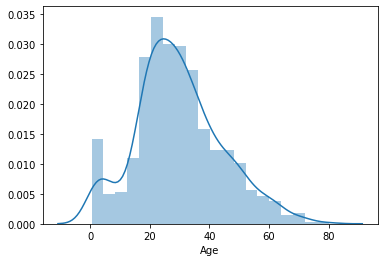

In [19]:
sns.distplot(titanic_train['Age'])

### 변수 선정을 위해 확인 교차분석 진행


• 상관 관계의 정도가 강한지 약한지 분석 가능  
• 교차분석은 쉬운 통계이기 때문에 전세계적으로 가장 많이 사용    
• 가설설정  
• 귀무가설 : 두 변수는 서로 독립적이다/관계가 없다  
• 대립가설 : 두 변수는 서로 독립적이지 않다/관계가 있다  

In [29]:
from scipy.stats import chi2_contingency
chi_res  = chi2_contingency(pd.crosstab(titanic_train['Sex'], titanic_train['Survived']))
print('Chi2 Statistic: {}, p-value: {}'.format(chi_res[0], chi_res[1]))

Chi2 Statistic: 260.71702016732104, p-value: 1.1973570627755645e-58


In [30]:
chi2_check = []
for i in titanic_train.columns.tolist():
    if chi2_contingency(pd.crosstab(titanic_train['Survived'], titanic_train[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
res = pd.DataFrame(data = [titanic_train.columns.tolist(), chi2_check] 
             ).T 
res.columns = ['Column', 'Hypothesis']
print(res)

         Column                      Hypothesis
0   PassengerId  Fail to Reject Null Hypothesis
1      Survived          Reject Null Hypothesis
2        Pclass          Reject Null Hypothesis
3          Name  Fail to Reject Null Hypothesis
4           Sex          Reject Null Hypothesis
5           Age          Reject Null Hypothesis
6         SibSp          Reject Null Hypothesis
7         Parch          Reject Null Hypothesis
8        Ticket          Reject Null Hypothesis
9          Fare          Reject Null Hypothesis
10        Cabin          Reject Null Hypothesis
11     Embarked          Reject Null Hypothesis
12       Cabin2          Reject Null Hypothesis


### t-test 독립검정 

서로 무관한 독립된 두 집단의 평균 차이를 검정하는 기법  
• 두 개의 독립적인 정규분포에서 나온 데이터 셋을 사용하여 두 정규분포의 기대값이 동일한지 검사  

#### 생존유무에 따른 Fare차이

• 가설설정    
• 귀무가설 : 두 변수 간 평균은 차이 없음  
• 대립가설 : 두 변수 간 평균은 차이 있음  

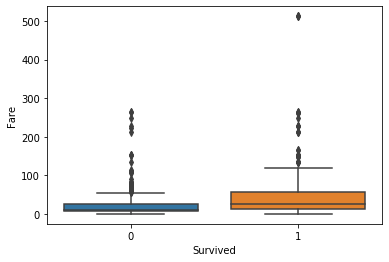

In [22]:
sns.boxplot(x='Survived', y='Fare', data=titanic_train)

In [23]:
mean = titanic_train['Fare'].values

In [24]:
mean1 = titanic_train[titanic_train['Survived']==0].Fare.values
mean2 = titanic_train[titanic_train['Survived']==1].Fare.values

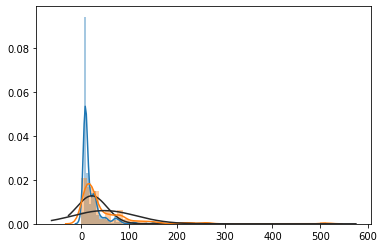

In [25]:
%matplotlib inline
sns.distplot(mean1, kde=True, fit=sp.stats.norm)
sns.distplot(mean2, kde=True, fit=sp.stats.norm)
plt.show()

In [26]:
sp.stats.shapiro(mean1)

(0.513036847114563, 3.233740189307736e-36)

In [27]:
sp.stats.levene(mean1, mean2)

LeveneResult(statistic=45.09964096576531, pvalue=3.337352710626e-11)

In [28]:
stats.ttest_ind(mean1, mean2, equal_var=False)

Ttest_indResult(statistic=-6.839099259085254, pvalue=2.6993323503141236e-11)

### 상관관계 

In [29]:
titanic_train.corr(method='pearson')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


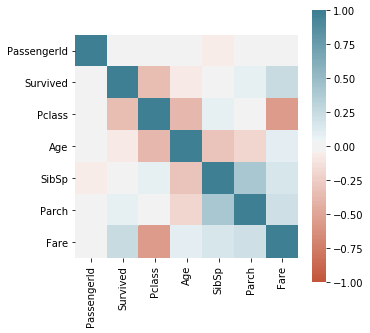

In [30]:
import seaborn as sns
corr = titanic_train.corr() 
plt.figure(figsize=(5, 5))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

### 생존예측을 위한 모델 구현 

In [9]:
titanic_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [10]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
titanic_train.Age.mean()

29.69911764705882

In [18]:
titanic_train['Age'].fillna(titanic_train['Age'].mean(),inplace=True)
titanic_train['Cabin'].fillna('N',inplace=True)
titanic_train['Embarked'].fillna('N',inplace=True)

0    549
1    342
Name: Survived, dtype: int64

전체 중 0인 비율 : 61.61616161616161 
전체 중 1인 비율 : 38.38383838383838


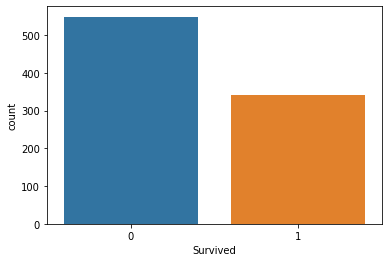

In [19]:
sns.countplot(titanic_train['Survived'])
print(titanic_train['Survived'].value_counts())
print('\n전체 중 0인 비율 :',titanic_train['Survived'].value_counts()[0]/len(titanic_train['Survived'])*100,
      '\n전체 중 1인 비율 :',titanic_train['Survived'].value_counts()[1]/len(titanic_train['Survived'])*100)

In [20]:
key_list = list()
value_list = list() 
cust_max_list = list()
cust_max_list2 = list()
cust_max_value = list()
cust_max_value2 = list() 
for key, value in dict(titanic_train.dtypes == object).items() : 
    if value : 
        key_list.append(key) 
        value_list.append(titanic_train[key].nunique())
        cust_max_list.append(titanic_train.groupby(key)['PassengerId'].nunique().sort_values(ascending =False).keys()[0])
        cust_max_value.append(titanic_train[key].value_counts(normalize=True).sort_values(ascending =False)[0])
        cust_max_list2.append(titanic_train.groupby(key)['PassengerId'].nunique().sort_values(ascending =False).keys()[1])
        cust_max_value2.append(titanic_train[key].value_counts(normalize=True).sort_values(ascending =False)[1])
result = pd.DataFrame({'column' : key_list
                     ,'label_count' : value_list 
                     ,'Top1_label':cust_max_list   
                     ,'Top1_percent':cust_max_value   
                     ,'Top2_label':cust_max_list2  
                     ,'Top2_percent':cust_max_value2  
                     })
result

,column,label_count,Top1_label,Top1_percent,Top2_label,Top2_percent
0,Name,891,"van Melkebeke, Mr. Philemon",0.001122,"Goldschmidt, Mr. George B",0.001122
1,Sex,2,male,0.647587,female,0.352413
2,Ticket,681,CA. 2343,0.007856,1601,0.007856
3,Cabin,148,N,0.771044,G6,0.004489
4,Embarked,4,S,0.722783,C,0.188552


In [21]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
# Name, ticket은 의미없는 변수이므로 삭제 처리 

In [23]:
titanic_train['Cabin']

0         N
1       C85
2         N
3      C123
4         N
       ... 
886       N
887     B42
888       N
889    C148
890       N
Name: Cabin, Length: 891, dtype: object

In [24]:
titanic_train['Cabin'].str[:1].unique()

array(['N', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [25]:
titanic_train['Cabin2'] = titanic_train['Cabin'].str[:1]

In [26]:
key_list = list()
value_list = list() 
cust_max_list = list()
cust_max_list2 = list()
cust_max_value = list()
cust_max_value2 = list() 
for key, value in dict(titanic_train.dtypes == object).items() : 
    if value : 
        key_list.append(key) 
        value_list.append(titanic_train[key].nunique())
        cust_max_list.append(titanic_train.groupby(key)['PassengerId'].nunique().sort_values(ascending =False).keys()[0])
        cust_max_value.append(titanic_train[key].value_counts(normalize=True).sort_values(ascending =False)[0])
        cust_max_list2.append(titanic_train.groupby(key)['PassengerId'].nunique().sort_values(ascending =False).keys()[1])
        cust_max_value2.append(titanic_train[key].value_counts(normalize=True).sort_values(ascending =False)[1])
result = pd.DataFrame({'column' : key_list
                     ,'label_count' : value_list 
                     ,'Top1_label':cust_max_list   
                     ,'Top1_percent':cust_max_value   
                     ,'Top2_label':cust_max_list2  
                     ,'Top2_percent':cust_max_value2  
                     })
result

,column,label_count,Top1_label,Top1_percent,Top2_label,Top2_percent
0,Name,891,"van Melkebeke, Mr. Philemon",0.001122,"Goldschmidt, Mr. George B",0.001122
1,Sex,2,male,0.647587,female,0.352413
2,Ticket,681,CA. 2343,0.007856,1601,0.007856
3,Cabin,148,N,0.771044,G6,0.004489
4,Embarked,4,S,0.722783,C,0.188552
5,Cabin2,9,N,0.771044,C,0.066218


In [31]:
chi2_check = []
for i in titanic_train.columns.tolist():
    if chi2_contingency(pd.crosstab(titanic_train['Survived'], titanic_train[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
res = pd.DataFrame(data = [titanic_train.columns.tolist(), chi2_check] 
             ).T 
res.columns = ['Column', 'Hypothesis']
print(res)

         Column                      Hypothesis
0   PassengerId  Fail to Reject Null Hypothesis
1      Survived          Reject Null Hypothesis
2        Pclass          Reject Null Hypothesis
3          Name  Fail to Reject Null Hypothesis
4           Sex          Reject Null Hypothesis
5           Age          Reject Null Hypothesis
6         SibSp          Reject Null Hypothesis
7         Parch          Reject Null Hypothesis
8        Ticket          Reject Null Hypothesis
9          Fare          Reject Null Hypothesis
10        Cabin          Reject Null Hypothesis
11     Embarked          Reject Null Hypothesis
12       Cabin2          Reject Null Hypothesis


In [32]:
titanic_train.drop(columns = ['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [33]:
titanic_train.isnull().sum().sum()

0

In [34]:
titanic_train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin2
0,0,3,male,22.0,1,0,7.2500,S,N
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,N


In [45]:
for key, value in dict(titanic_train.dtypes == object).items() : 
    if value :
        print(key)

Sex
Embarked
Cabin2


1. One-hot Encoding
2. Label Encoding
3. Mean Encoding (default)  
    Smoothing  
    CV loop  
    Expanding mean  

### 1. One-hot Encoding

In [35]:
# object형 >> one-hot encoding 진행 
for key, value in dict(titanic_train.dtypes == object).items() : 
    if value : 
        titanic_train_aa = pd.get_dummies(titanic_train, columns=[key])

In [36]:
titanic_train_aa.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin2_A,Cabin2_B,Cabin2_C,Cabin2_D,Cabin2_E,Cabin2_F,Cabin2_G,Cabin2_N,Cabin2_T
0,0,3,male,22.0,1,0,7.2500,S,0,0,0,0,0,0,0,1,0
1,1,1,female,38.0,1,0,71.2833,C,0,0,1,0,0,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,0,0,0,0,0,1,0


### 2. Label Encoding

In [37]:
from sklearn.preprocessing import LabelEncoder
for key, value in dict(titanic_train.dtypes == object).items() : 
    if value : 
        le = LabelEncoder()
        le = le.fit(titanic_train[key])
        titanic_train[key] = le.transform(titanic_train[key])

In [38]:
le.classes_

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'N', 'T'], dtype=object)

In [39]:
titanic_train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin2
0,0,3,1,22.0,1,0,7.2500,3,7
1,1,1,0,38.0,1,0,71.2833,0,2
2,1,3,0,26.0,0,0,7.9250,3,7


In [40]:
titanic_train.shape

(891, 9)

In [41]:
from sklearn.model_selection import train_test_split
input_df = titanic_train.drop('Survived', axis=1)
target_df = titanic_train['Survived']
X_train, X_test, y_train, y_test = train_test_split(input_df, target_df, test_size=0.3,random_state=111)

In [43]:
X_train.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin2
195,1,0,58.0,0,0,146.5208,0,1
150,2,1,51.0,0,0,12.5250,3,7
572,1,1,36.0,0,0,26.3875,3,4


In [45]:
y_train

195    1
150    0
572    1
134    0
96     0
      ..
275    1
86     0
724    1
876    0
852    0
Name: Survived, Length: 623, dtype: int64

In [42]:
## 하이퍼파라미터튜닝
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

## ML모델 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## ACCURACY 등 모델 평가를 위한 Function 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_auc_score

In [209]:
lr_clf = LogisticRegression()

In [210]:
X_train.shape

(623, 8)

In [47]:
## 모델 생성 
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(max_iter=500 )

## fitting 및 평가 
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

## fitting 및 평가 
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

## fitting 및 평가 
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

DecisionTreeClassifier 정확도: 0.7761
LogisticRegression 정확도: 0.7873
RandomForestClassifier 정확도:0.8321


In [48]:
parameters = {'max_depth':[2,3,5,7,10],'min_samples_split':[2,3,5], 'min_samples_leaf':[1,3,7]}

grid_rf = GridSearchCV(rf_clf , param_grid=parameters , scoring='accuracy' , cv=5)
grid_rf.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_rf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_rf.best_score_))
best_rf = grid_rf.best_estimator_

result = best_rf.predict(X_test)
accuracy = accuracy_score(y_test , result)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
GridSearchCV 최고 정확도: 0.8138
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8358


In [49]:
rf_clf = RandomForestClassifier(max_depth=5, min_samples_leaf=1,min_samples_split =5 )
rf_model = rf_clf.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_prob=rf_model.predict_proba(X_test)[:,1]

In [215]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [216]:
def cut_off(y,threshold):
    Y = y.copy() # copy함수를 사용하여 이전의 y값이 변화지 않게 함
    Y[Y>threshold]=1
    Y[Y<=threshold]=0
    return(Y.astype(int))

In [217]:
## biz 관점 적정 threshold 찾기

prob_y=rf_prob
threshold = np.arange(0,1,0.1)
table = pd.DataFrame(columns=[['Confusion_matrix','예측_target수','정분류율_Accuracy','정확도_Precision','재현율_Recall','F1 score']])
for i in threshold:
    pred_Y = cut_off(prob_y,i)
    confusion = confusion_matrix(y_test, pred_Y)
    pred_target = confusion_matrix(y_test, pred_Y)[:,1].sum()
    accuracy = accuracy_score(y_test , pred_Y)
    precision = precision_score(y_test , pred_Y)
    recall = recall_score(y_test , pred_Y)
    f1 = f1_score(y_test,pred_Y)
    table.loc[i] =  confusion, pred_target, accuracy, precision,recall,f1
    table.index.name='threshold'
#table.columns.name='performance'
table

,Confusion_matrix,예측_target수,정분류율_Accuracy,정확도_Precision,재현율_Recall,F1 score
threshold,,,,,,
0.0,"[[0, 171], [0, 97]]",268,0.361940,0.361940,1.000000,0.531507
0.1,"[[1, 170], [0, 97]]",267,0.365672,0.363296,1.000000,0.532967
0.2,"[[97, 74], [13, 84]]",158,0.675373,0.531646,0.865979,0.658824
0.3,"[[114, 57], [15, 82]]",139,0.731343,0.589928,0.845361,0.694915
0.4,"[[136, 35], [21, 76]]",111,0.791045,0.684685,0.783505,0.730769
0.5,"[[152, 19], [32, 65]]",84,0.809701,0.773810,0.670103,0.718232
0.6,"[[167, 4], [39, 58]]",62,0.839552,0.935484,0.597938,0.729560
0.7,"[[169, 2], [47, 50]]",52,0.817164,0.961538,0.515464,0.671141
0.8,"[[170, 1], [64, 33]]",34,0.757463,0.970588,0.340206,0.503817


In [218]:
from sklearn.inspection import permutation_importance

In [219]:
C = titanic_train.iloc[:, titanic_train.columns != 'Survived'].head()

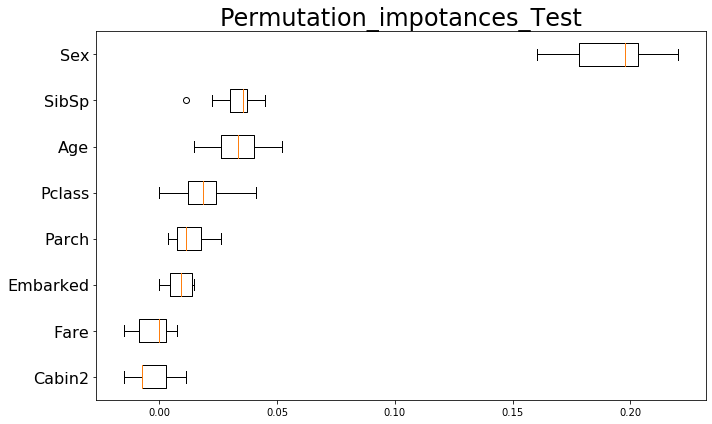

In [220]:
result = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels = C.columns[sorted_idx] )
ax.set_title("Permutation_impotances_Test",fontsize=24)
plt.yticks(fontsize=16)
fig.tight_layout()
plt.show()

In [38]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
#irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [41]:
from sklearn.cluster import KMeans
clusterer = KMeans(n_clusters = 3, max_iter=300, random_state=0)
cluster_labels = clusterer.fit_predict(irisDF)

In [42]:
irisDF['cluster'] = cluster_labels

In [43]:
irisDF['target']=iris.target

In [44]:
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,cluster,target
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0


In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(irisDF)
irisDF_pca = pca.transform(irisDF)
print(irisDF_pca.shape)

(150, 3)


In [45]:
irisDF['pca_1'] = irisDF_pca[:,0]
irisDF['pca_2'] = irisDF_pca[:,1]
irisDF['pca_3'] = irisDF_pca[:,2]

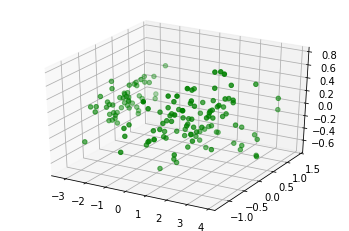

In [47]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(irisDF.pca_1, irisDF.pca_2, irisDF.pca_3, color='green')

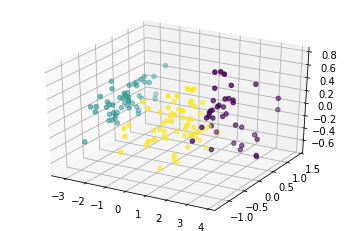

In [56]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(irisDF.pca_1, irisDF.pca_2, irisDF.pca_3, c = irisDF.cluster )
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

In [50]:
test = irisDF[irisDF.target != 2]

In [51]:
test.head(3)

,sepal_length,sepal_width,petal_length,petal_width,cluster,target,pca_1,pca_2,pca_3
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397,-0.027915
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001,-0.210464
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949,0.017900


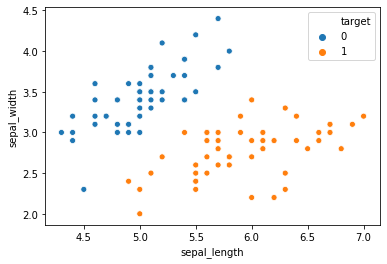

In [53]:
sns.scatterplot(test.sepal_length, test.sepal_width, hue=test.target)